In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [22]:
path = 'D:\\2_Programming\\data science\\pikabu-predictor\\data\\raw\\'

_, _, filenames = next(os.walk(path))
filenames = [filename for filename in filenames if (len(filename) > 3 and filename[-4:] == '.csv')]

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(path + filename))
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.head()

,index,rating,url,text,tags,title,image_count,video_count,publ_time,author_name
0,0,22,https://pikabu.ru/story/tigra_6397145,Сегодня весьма интересный был для меня день. В...,"['Тигра комикс', 'СТО', 'Автосервис', 'Свое де...",Тигра,2,0,2019-01-01 23:59:54+03:00,tigrakot
1,1,5,https://pikabu.ru/story/shum_v_ushakh_ili_razv...,"Приветствую, товарищи! Думаю я такой не один, ...","['Шум в ушах', 'Невроз', 'Слух', 'Текст']",Шум в ушах или развивающийся невроз. Кто сталк...,0,0,2019-01-01 23:59:41+03:00,Otto61
2,2,11,https://pikabu.ru/story/golodayu_6397142,"Ну, мой рост 175 СМ, а вес шагает к 90 семимил...","['Голод', 'Похудение', 'Текст']",Голодаю,0,0,2019-01-01 23:59:24+03:00,lazyIgor
3,3,620,https://pikabu.ru/story/zabavyi_pri_vstreche_n...,NaN,"['Новый Год', 'Краснодар', 'Салют', 'Видео']",Забавы при встрече Нового Года,0,1,2019-01-01 23:59:24+03:00,1no4ka
4,4,534,https://pikabu.ru/story/ovcharka_moya_6397141,"Сейчас статью прочитала о том, что немецкие ов...","['Собака', 'Семья', 'Грусть', 'Длиннопост']",Овчарка моя,2,0,2019-01-01 23:58:51+03:00,Etoia09


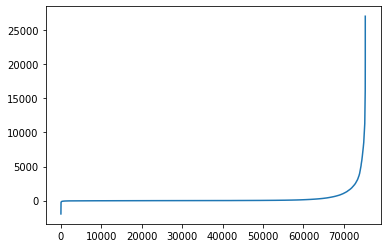

In [43]:
plt.plot(df.sort_values(by=['rating']).rating.values)
plt.show()

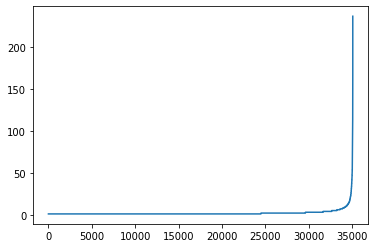

,rating,url,text,tags,title,image_count,video_count,publ_time
count,35053.000000,35053.000000,35053.000000,35053.000000,35053.000000,35053.000000,35053.000000,35053.000000
mean,2.134482,2.134482,1.497675,2.134482,2.134482,2.134482,2.134482,2.134482
std,5.040728,5.040728,3.368167,5.040728,5.040728,5.040728,5.040728,5.040728
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,237.000000,237.000000,148.000000,237.000000,237.000000,237.000000,237.000000,237.000000


In [51]:
authors = df.groupby('author_name').count().sort_values(by=['url'])
plt.plot(authors.url.values)
plt.show()
authors.describe()

In [63]:
df.quantile(0.).rating, df.quantile(0.25).rating, df.quantile(0.5).rating, df.quantile(0.75).rating, df.quantile(1.).rating

(-1943.0, -4.25, 12.0, 77.0, 27021.0)

[('Длиннопост', 20168), ('Текст', 15942), ('Видео', 10549), ('Кот', 4662), ('Юмор', 4102), ('Фотография', 3477), ('Скриншот', 2812), ('Гифка', 2086), ('Без рейтинга', 1789), ('Собака', 1667)]


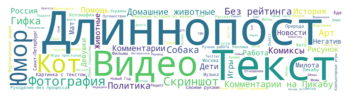

In [49]:
from wordcloud import WordCloud

all_tags = []
for i in df.tags:
    all_tags += i[2:-2].split("', '")

from collections import Counter
c = Counter(all_tags)

print(c.most_common(10))
#w = WordCloud(max_words = 10).generate_from_text(' '.join(all_tags))
w = WordCloud(max_words=100, background_color="white", width=4000, height=1000).fit_words(c)

plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("wordcloud.png", format="png")

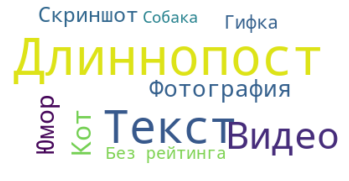